In [1]:
%display latex

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

Auteur: Pablo DI MUZIO

# TP6: Matrices, système linéaire et calcul intégral
On fait le choix d'utiliser le moteur latex de Sage tout en écrivant le code en numpy natif.

## Exercice 1:

In [2]:
def LU(M):
    
    n = len(M)
    L = np.identity(n)
    U = np.zeros((n, n))
    
    # On commence par vérifier l'inversibilité de la matrice:
    if np.linalg.det(M) == 0:
        return np.zeros((n,n)), np.zeros((n,n)), False

    for i in range(n):
        for j in range(i, n):
            U[i, j] = M[i, j] - sum(L[i, k] * U[k, j] for k in range(i))
        for j in range(i, n):
            if i == j:
                L[i, j] = 1
            else:
                L[j, i] = (M[j, i] - sum(L[j, k] * U[k, i] for k in range(i))) / U[i, i]
    return L, U, True

In [3]:
M = np.array([[1,1,1], [1,3,2], [0,2,0]])
Matrix(QQ,LU(M)[0]),Matrix(QQ,LU(M)[1]), LU(M)[2]

(
[1 0 0]  [ 1  1  1]      
[1 1 0]  [ 0  2  1]      
[0 1 1], [ 0  0 -1], True
)

## Exercice 2:

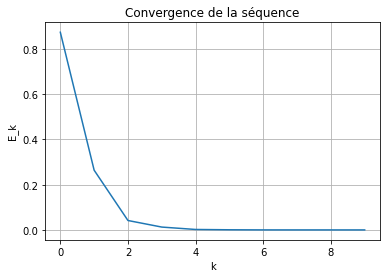

In [4]:
A = np.array([[0, 1/3], [-1/7, 0]])
B = np.array([[2/3], [-5/7]])
S = np.array([[9/22], [-17/22]])
X_0 = np.array([[0], [0]])

xk = []
yk = []

X_k = X_0
for k in range(10):
    xk.append(k)
    yk.append(np.linalg.norm(X_k - S))
    X_k = np.dot(A, X_k) + B

plt.plot(xk, yk)
plt.xlabel('k')
plt.ylabel('E_k')
plt.title('Convergence de la séquence')
plt.grid(True)
plt.show()

On remarque que dès le rang 4, on a $E_k < 0.01$, ce qui nous montre que l'approximation se fait très rapidement.

## Exercice 3:

1. Création de la fonction `f`

In [5]:
def f(x):
    return np.exp(x) * np.sin(x)

2. Création de la fonction `trapèze`

In [6]:
def trapeze(g, a, b, N):
    h = (b - a) / N
    I = (g(a) + g(b)) / 2
    for i in range(1, N):
        x = a + i * h
        I += g(x)
    I *= h
    return I

3. Création de la fonction `testtrapeze`

In [7]:
def testtrapeze(g, a, b, eps):
    I, _ = quad(g, a, b)
    n = 1
    Iapp = trapeze(g, a, b, n)
    while abs(I - Iapp) > eps:
        n += 1
        Iapp = trapeze(g, a, b, n)
    return Iapp, I, abs(I - Iapp), n

4. Test de la fonction

In [8]:
epsilon = 4.23*10**(-7)
testtrapeze(f, 0, 0.5, epsilon)

(0.1717754458371399, 0.17177502331472286, 4.225224170539832e-07, 247)

5. (Bonus) Déclaration des fonctions `simpson`, `rectM` et de `testsimpson`, `testrectM`

In [9]:
def simpson(g, a, b, N):
    h = (b - a) / N
    I = g(a) + g(b)
    for i in range(1, N, 2):
        x = a + i * h
        I += 4 * g(x)
    for i in range(2, N, 2):
        x = a + i * h
        I += 2 * g(x)
    I *= h / 3
    return I

def testsimpson(g, a, b, eps):
    I, _ = quad(g, a, b)
    n = 1
    Iapp = simpson(g, a, b, n)
    while abs(I - Iapp) > eps:
        n += 1
        Iapp = simpson(g, a, b, n)
    return Iapp, I, abs(I - Iapp), n

def rectM(g, a, b, N):
    h = (b - a) / N
    I = 0
    for i in range(N):
        x = a + (i + 0.5) * h
        I += g(x)
    I *= h
    return I

def testrectM(g, a, b, eps):
    I, _ = quad(g, a, b)
    n = 1
    Iapp = rectM(g, a, b, n)
    while abs(I - Iapp) > eps:
        n += 1
        Iapp = rectM(g, a, b, n)
    return Iapp, I, abs(I - Iapp), n

6. (Bonus) Test des fonctions dans les mêmes conditions que pour `trapeze`.

In [10]:
testrectM(f, 0, 0.5, epsilon)

(0.17177460245476248, 0.17177502331472286, 4.2085996038165874e-07, 175)

In [11]:
testsimpson(f, 0, 0.5, epsilon)

(0.17177484032465953, 0.17177502331472286, 1.8299006332433976e-07, 6)

On se rend compte de l'efficacité de l'approximation de Simpson puisqu'elle nous permet de nous approcher au même epsilon environ 41 fois plus rapidement. Là où l'approximation des rectangles au milieu ne nous sauve "que" 72 itérations. 